<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/decisionTree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 04th May, 2021
# Myfolder: D:\data\OneDrive\Documents\decision_trees
# Ref: https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956
# Objectives:
#            i) To quickly create a decision tree
#           ii) To see the decision tree
#          iii) Understand how impurity is calculated
#           iv) Sensitivity of decision tree to changes in data
#            v) Sensitivity of decision tree to rotation in data


# Decision tree

### Call libraries

In [1]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz

# 1.1.5 Import iris
from sklearn.datasets import load_iris

# 1.1.6
# Install as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
import graphviz

# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
# 1.2 For tree visualization

"""
Ref: https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation
Install on Anaconda using following two commands, as:

conda install python-graphviz
conda install -c anaconda pydot

"""

In [2]:
# 1.3 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load data & explore

In [4]:
# 2.0 Get iris dataset
data = load_iris()
type(data)    # sklearn.utils.Bunch 
              # 'Bunch' is a dict that supports
              #  attribute-style access

sklearn.utils.Bunch

What is Bunch?  
Bunch is a subclass of the Dict class and supports all the methods as dict does. In addition, it allows you to use the keys as attributes. Bunch is just like dictionary but it supports attribute type access. 

In [5]:
# 2.1
X = data['data']                # Bunch being accessed like a dict
y = data['target']
col_names = data.feature_names  # Attribute like access in Bunch
target_name = data.target_names # Attribute like access


In [ ]:
# 2.1.2
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# 2.2 Create a DataFrame
iris = pd.DataFrame(X,columns=col_names)
iris['target'] = y

In [7]:
# 2.3 Explore data:

iris.head()
print()
iris.shape   # (150, 5)
print()
iris.dtypes
print("\n\n---Distribution of target value ---\n")
iris['target'].value_counts()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(150, 5)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object



---Distribution of target value ---



2    50
1    50
0    50
Name: target, dtype: int64

### Process data

In [9]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
# 2.5 Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# 2.5.1 About train data:
                                   
X_train.shape  # (105,4)
print()

# 2.5.2 Test data:

X_test.shape   # (45,4)
print()

(105, 4)

(45, 4)

### Decision tree modeling

In [ ]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [ ]:
# 3.2 Train our decision tree:

ct.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predictions

In [ ]:
# 4.0 Make predictions of test data
y_te = ct.predict(X_test)

In [ ]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size  # 0.93

0.9333333333333333

### Decision tree plot
Impurity index: gini

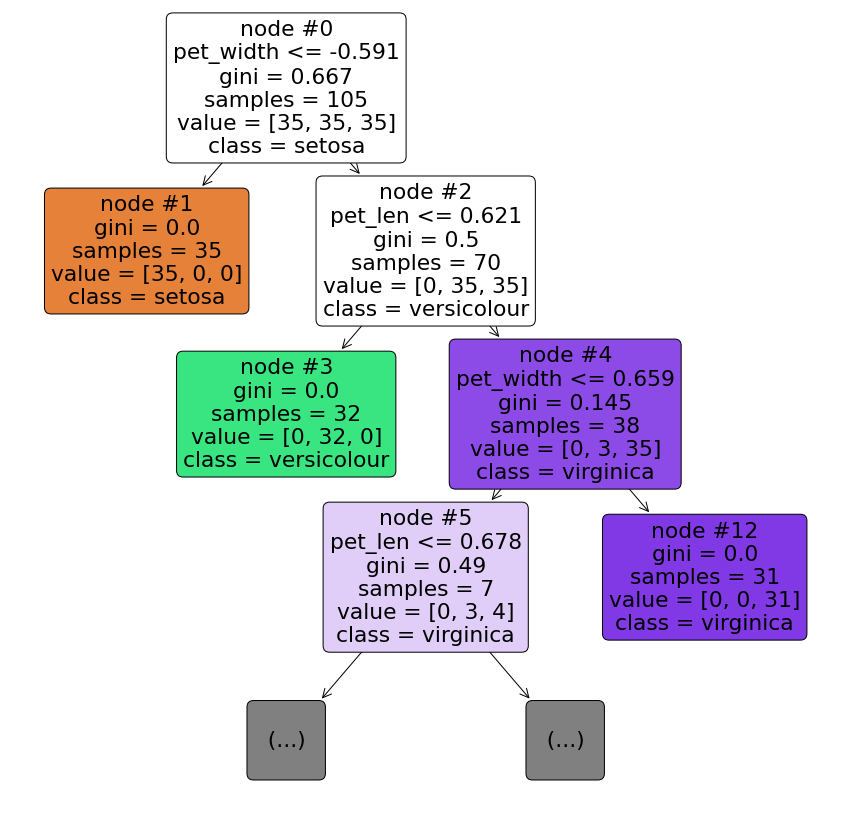

In [ ]:
# 4.2 Plot decision tree
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

### Decision tree plot
Impurity index: Entropy

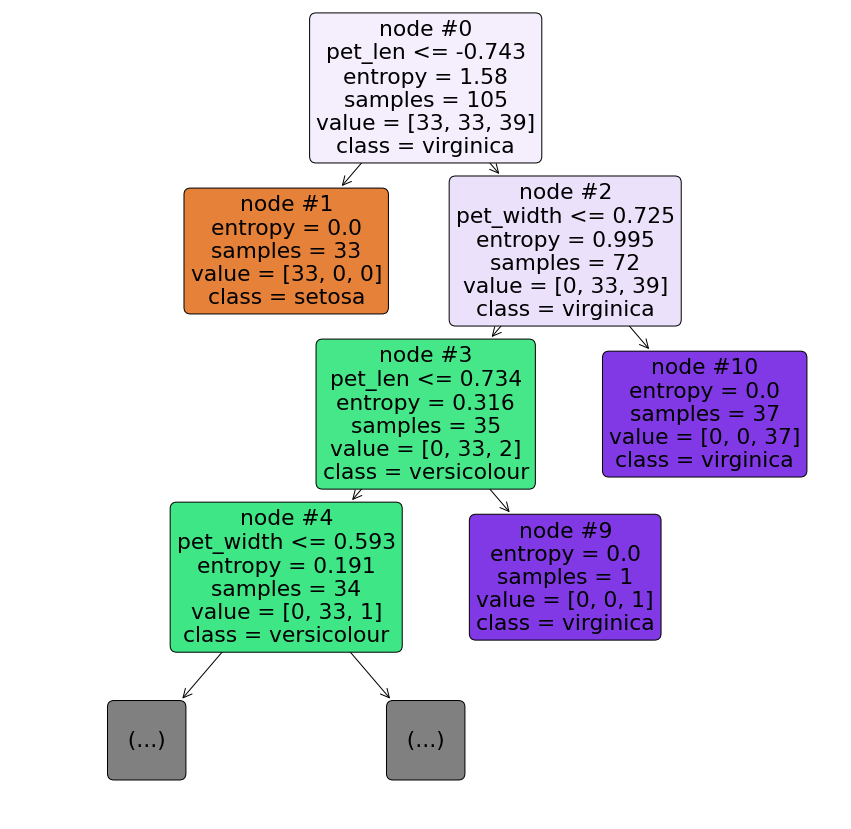

In [ ]:
# 5.0 Plot decision tree with 'entropy' as criterion:

ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

In [ ]:
# 5.3 Make predictions of test data
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size  # 0.93

0.9333333333333333

In [ ]:
# 6.0 Entropy at Node #0 (sample calculations):

[-33/105*np.log2(33/105) - 33/105 * np.log2(33/105) - 39/105 * np.log2(39/105) ]

[1.5803341042062597]

## Impurity criterion
Understanding Gini Index and Entropy


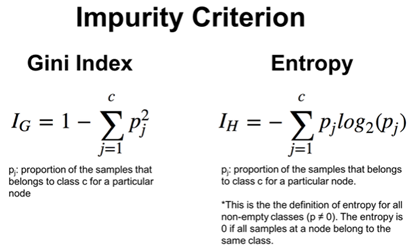

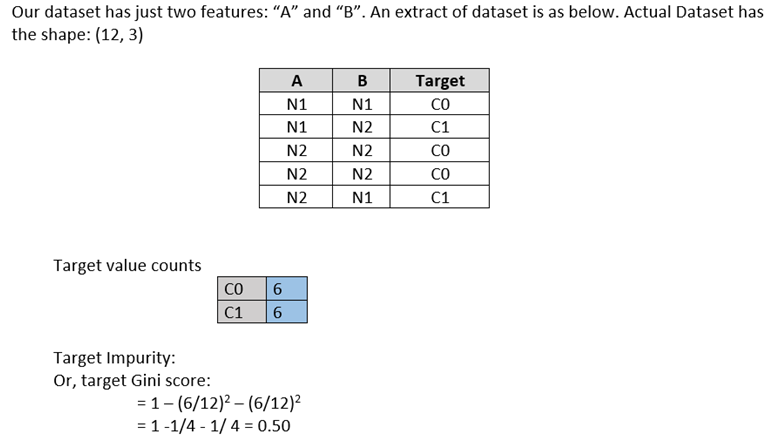

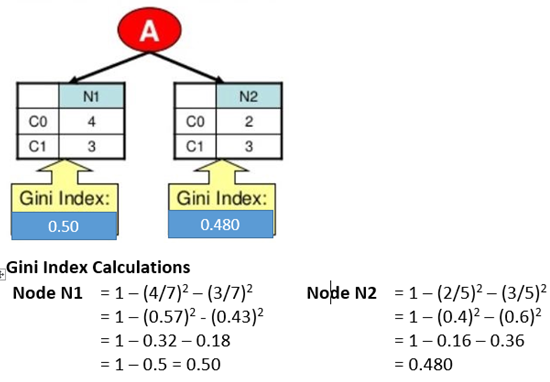

Which split is better? Split at "A" or at "B"?

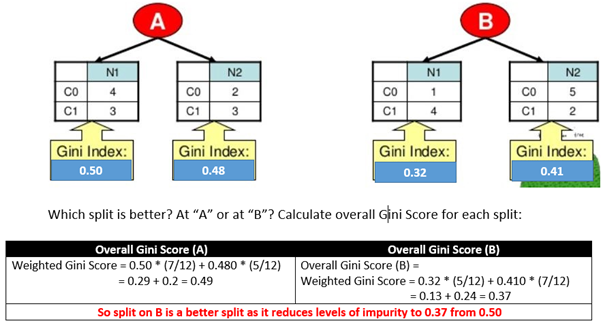

#### Gini-index vs Entropy
Graphs of gini-index and entropy when level of impurity changes from 0.1 to 0.9. Both graphs peak at the same time and fall to zero at the same time. Impurity is maximum when p = 0.5. 

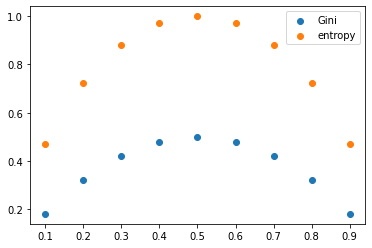

In [ ]:
# 7.0 Let us assume our target has two levels.
import matplotlib.pyplot as plt
import numpy as np
# 7.1
gini = []
entropy = []
i = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 7.2
for p in i:
  gini.append(1 - p *p - (1-p) * (1-p))
  entropy.append( - p * np.log2(p) - (1-p) * np.log2(1-p) )

# 7.3 Plot both
_=plt.scatter(i,gini, label = "Gini")
_=plt.scatter(i,entropy, label = "entropy")
_=plt.legend()

In [ ]:
########## I am done ##################

In [ ]:
# 8.0 Which features are important:

fi = ct.feature_importances_
fi

array([0.01433251, 0.        , 0.02623211, 0.95943537])

In [ ]:
# 8.1 Get a list:

list(zip(iris.columns, fi))

[('sepal length (cm)', 0.014332514332514335),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.02623211446740857),
 ('petal width (cm)', 0.959435371200077)]

In [ ]:
######### Drop 'c2' and repeat above steps #############

# 9. Start modeling
# 9.1 Initialize our decision tree object
ct1 = dtree(
            criterion="gini",    # Alternative 'entropy'
            splitter="best",     # Alternative 'random'
            max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
            )

In [ ]:
# 9.2 Train our decision tree (tree induction + pruning)
ct1.fit(X_train[['c1', 'c3', 'c4']],y_tr)

In [ ]:
# 9.3 Now make prediction
out = ct1.predict(X_test[['c1', 'c3', 'c4']])
out

In [ ]:
# 9.4 Get accuracy
np.sum((out == y_te))/out.size

In [ ]:
# 10.0 Which features are important
fi = ct1.feature_importances_
fi
list(zip(X[['c1', 'c3', 'c4']].columns, fi))

In [ ]:
# Ref: https://stackoverflow.com/a/46374279/3282777

feature_names=[ 'c1','c2','c3','c4']
class_names = ['setosa','versicolor', 'virginica']
dot_data = export_graphviz(c_tree, out_file=None,
                     feature_names=feature_names,
                     class_names=class_names,
                     filled=True, rounded=True,
                     special_characters=True)

# 11.1
graph = graphviz.Source(dot_data)

# 11.2 A pdf file is created in your current folder
graph.render("iris")

'iris.pdf'

In [ ]:
####### I am done ###########33

##Parametric vs non-parametric model
Decison trees are non-parametric models. What does that mean. Read on....  

Very briefly parametric models make some assumptions regarding probability distribution of data (as for example in Linear regression models).  
Non-parametric models make no assumptions about distribution of data, as for example, KNN model, decsion tree models and SVM.

 How to insert a youtube video in Jupyter labs?  

See this github [link](https://gist.github.com/christopherlovell/e3e70880c0b0ad666e7b5fe311320a62).
In the following code, note the last part of URL: `https://www.youtube.com/embed/UgwUi8fu0CY`. The id, '`UgwUi8fu0CY`', identifies the video (it is the last part of your youtube URL: `https://www.youtube.com/watch?v=UgwUi8fu0CY`.

In [ ]:
# 7.0 See this YouTube Video

from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/UgwUi8fu0CY?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## Negative aspects of Decison trees

### Sensitive to slight changes in data
Depending upon which two rows get removed, the tree changes. Repeat the execution of following code multiple times.

In [28]:
# 8.0 Remove just two rows and decision tree changes:
#     Sensitivity of decision trees to changes in data


X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
_=ct1.fit(X_train[2:,:],y_train[2:])

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

ValueError: ignored

### Sensitivity of decison trees to rotation of data

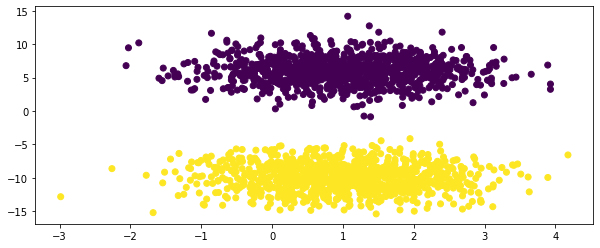

In [14]:
# 8.1 Generate some data:
def_rng = np.random.default_rng()
df = def_rng.multivariate_normal(
                                  mean = [1,6],
                                  cov =  [
                                          [1.0,0.0],
                                          [0.0,4.0]
                                          ],
                                  size = [1000]
                                 )

df1 = def_rng.multivariate_normal(
                                   mean = [1,-10],
                                   cov = [
                                          [1.0,0.0],
                                          [0.0,4.0]
                                          ],
                                   size = [1000]
                                  )
dfx = np.vstack([df,df1])
target = [0]*1000 + [1]*1000
_=plt.figure(figsize = (10,4))
_=plt.scatter(dfx[:,0], dfx[:,1], c = target)

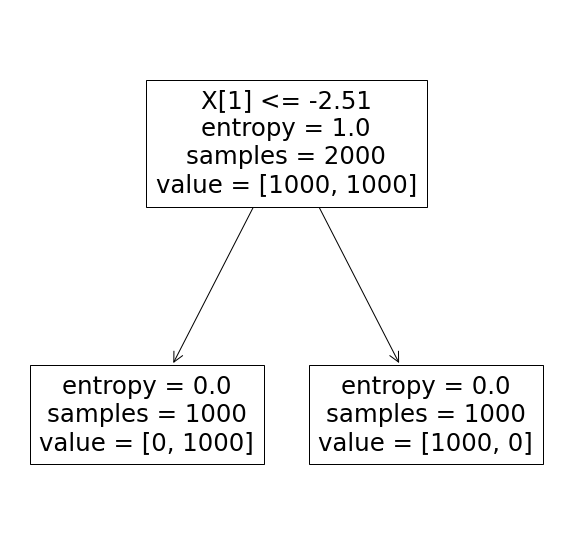

In [16]:
# 8.2 Draw a decison tree for above data
#     It is a very simple tree. Naturally
ct = dtree(criterion='entropy')
_=ct.fit(dfx,target)
_=plt.figure(figsize = (10,10))
_=plot_tree(ct, max_depth=2)

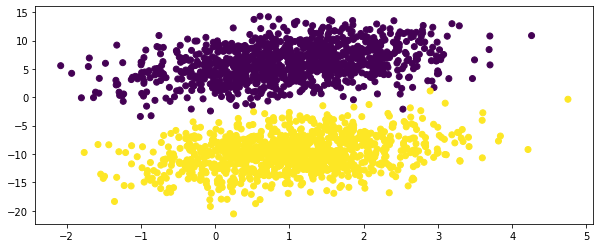

In [26]:
# 8.3 Next let us rotate the data a little bit:
#     Tree becomes more complex
df = def_rng.multivariate_normal(
                                 mean = [1,6],
                                 cov = [
                                         [1.0,1.0],
                                         [1.0,10.0]
                                        ],
                                size = [1000]
                                 )

df1 = def_rng.multivariate_normal(
                                   mean = [1,-10],
                                   cov = [
                                          [1.0,1.0],
                                          [1.0,10.0]
                                          ],
                                   size = [1000]
                                  )
dfx = np.vstack([df,df1])
target = [0]*1000 + [1]*1000
_=plt.figure(figsize = (10,4))
_=plt.scatter(dfx[:,0], dfx[:,1], c = target)

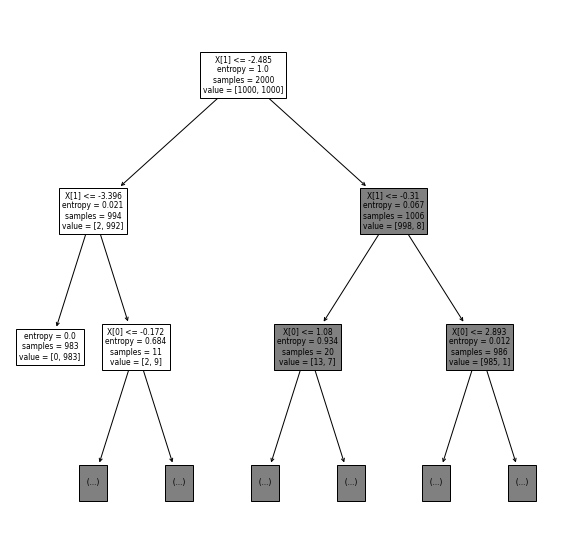

In [27]:
# 8.4 Draw a decison tree for above data
#     Tree becomes very complex
#     Even though there is a simple 
#     inclined stratight-line that separates
#     the two clusters:
ct = dtree(criterion='entropy')
_=ct.fit(dfx,target)
_=plt.figure(figsize = (10,10))
_=plot_tree(ct, max_depth=2)

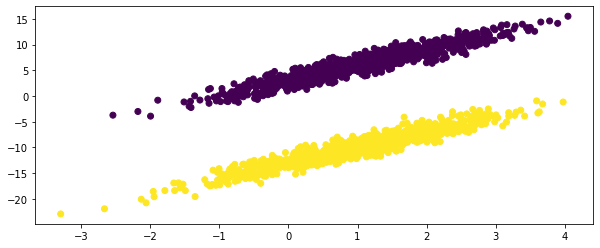

In [20]:
# 9.0 Following two data sources have
#     larger rotation.
df = def_rng.multivariate_normal(
                                 mean = [1,6],
                                 cov = [
                                         [1.0,3.0],  # Change 3.0 to see rotation effect
                                         [3.0,10.0]
                                        ],
                                size = [1000]
                                 )

df1 = def_rng.multivariate_normal(
                                   mean = [1,-10],
                                   cov = [
                                          [1.0,3.0], # Change 3.0 to see rotation effect
                                          [3.0,10.0]
                                          ],
                                   size = [1000]
                                  )
dfx = np.vstack([df,df1])
target = [0]*1000 + [1]*1000
_=plt.figure(figsize = (10,4))
_=plt.scatter(dfx[:,0], dfx[:,1], c = target)

In [ ]:
##### Done ################